In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Data Base

In [2]:
def npy_loader(path):
    return torch.from_numpy(np.load(path))

In [3]:
BoldTrainDataImages = npy_loader("BoldArrowsDataBase\\BoldTrainDataImages.npy")
BoldTrainDataLables = npy_loader("BoldArrowsDataBase\\BoldTrainDataLables.npy")
BoldTestDataImages = npy_loader("BoldArrowsDataBase\\BoldTestDataImages.npy")
BoldTestDataLables = npy_loader("BoldArrowsDataBase\\BoldTestDataLables.npy")

### Lables

0 = SetaBaixo;
1 = SetaCima;
2 = SetaEsquerda;
3 = SetaDireita;

In [4]:
BoldTrainDataLables_OneHot = F.one_hot(BoldTrainDataLables.to(torch.int64),num_classes=4)
BoldTrainDataLables_OneHot

tensor([[0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]])

In [5]:
BoldTrainDataImages.view(-1,28**2).shape

torch.Size([3200, 784])

## Dataset Object

In [6]:
def npy_loader(path):
    return torch.from_numpy(np.load(path))

class CTDataset(Dataset):
    def __init__(self, filepathImg, filepathLables):
        self.x = npy_loader(filepathImg).to(torch.float32)
        self.y = npy_loader(filepathLables)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y.to(torch.int64), num_classes=4).to(float)
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

In [7]:
BoldTrain_ds = CTDataset("BoldArrowsDataBase\\BoldTrainDataImages.npy","BoldArrowsDataBase\\BoldTrainDataLables.npy")
BoldTest_ds = CTDataset("BoldArrowsDataBase\\BoldTestDataImages.npy","BoldArrowsDataBase\\BoldTestDataLables.npy")

In [8]:
xs, ys  = BoldTrain_ds[0:4]

In [9]:
xs

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0118, 0.0000,  ..., 0.0118, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0157,  ..., 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0039, 0.0000,  ..., 0.0039, 0.0039, 0.

In [10]:
ys

tensor([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)

## Data Loader

In [19]:
BoldTrain_dl = DataLoader(BoldTrain_ds,batch_size=5)
for x, y in BoldTrain_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 4])


### Cross Entropy Loss (Função calculo de erro)

In [20]:
L = nn.CrossEntropyLoss()

# A Rede

In [21]:
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,18,3)
        self.fc1 = nn.Linear(18*6*6,50)
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,4)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.pool(self.R(self.conv1(x)))
        x = self.pool(self.R(self.conv2(x)))
        x = x.view(-1,18*6*6)
        x = self.R(self.fc1(x))
        x = self.R(self.fc2(x))
        x = self.fc3(x)
        return x.squeeze()

In [22]:
f = MyCNN()

In [23]:
for each in xs:
    print(f(each.view(1,28,28)))

tensor([-0.0175, -0.0350,  0.0277,  0.0171], grad_fn=<SqueezeBackward0>)
tensor([-0.0156, -0.0346,  0.0257,  0.0154], grad_fn=<SqueezeBackward0>)
tensor([-0.0164, -0.0386,  0.0292,  0.0145], grad_fn=<SqueezeBackward0>)
tensor([-0.0185, -0.0426,  0.0310,  0.0225], grad_fn=<SqueezeBackward0>)


## Treinamento

In [24]:
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            for j in range(len(x)):
                # Update the weights of the network
                opt.zero_grad() 
                loss_value = L(f(x[j].view(1,28,28)), y[j]) 
                loss_value.backward() 
                opt.step() 
                # Store training data
                epochs.append(epoch+i/N)
                losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [25]:
epoch_data, loss_data = train_model(BoldTrain_dl,f)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


Text(0.5, 1.0, 'Cross Entropy (per batch)')

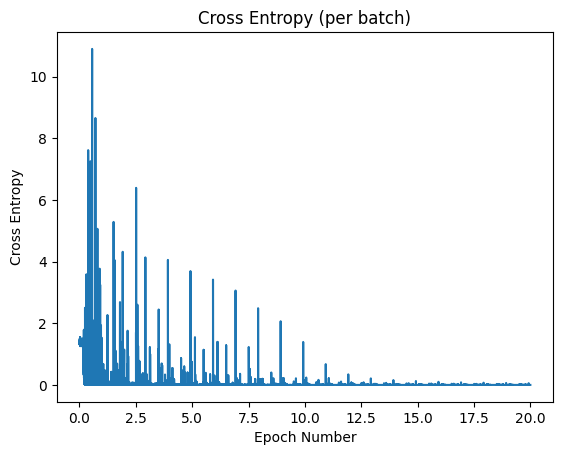

In [26]:
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

In [27]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

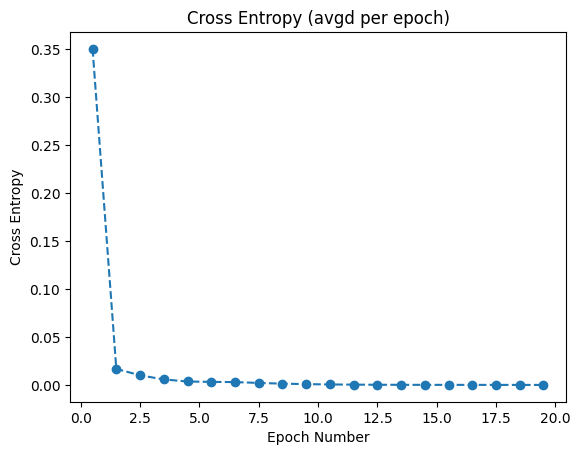

In [28]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [55]:
xs, ys = BoldTest_ds[0:100]
yhats = np.zeros(shape=(100))
i=0
for each in xs:
    yhats[i] = f(each.view(1,28,28)).argmax().item()
    i += 1
ysArg = ys.argmax(axis=1)

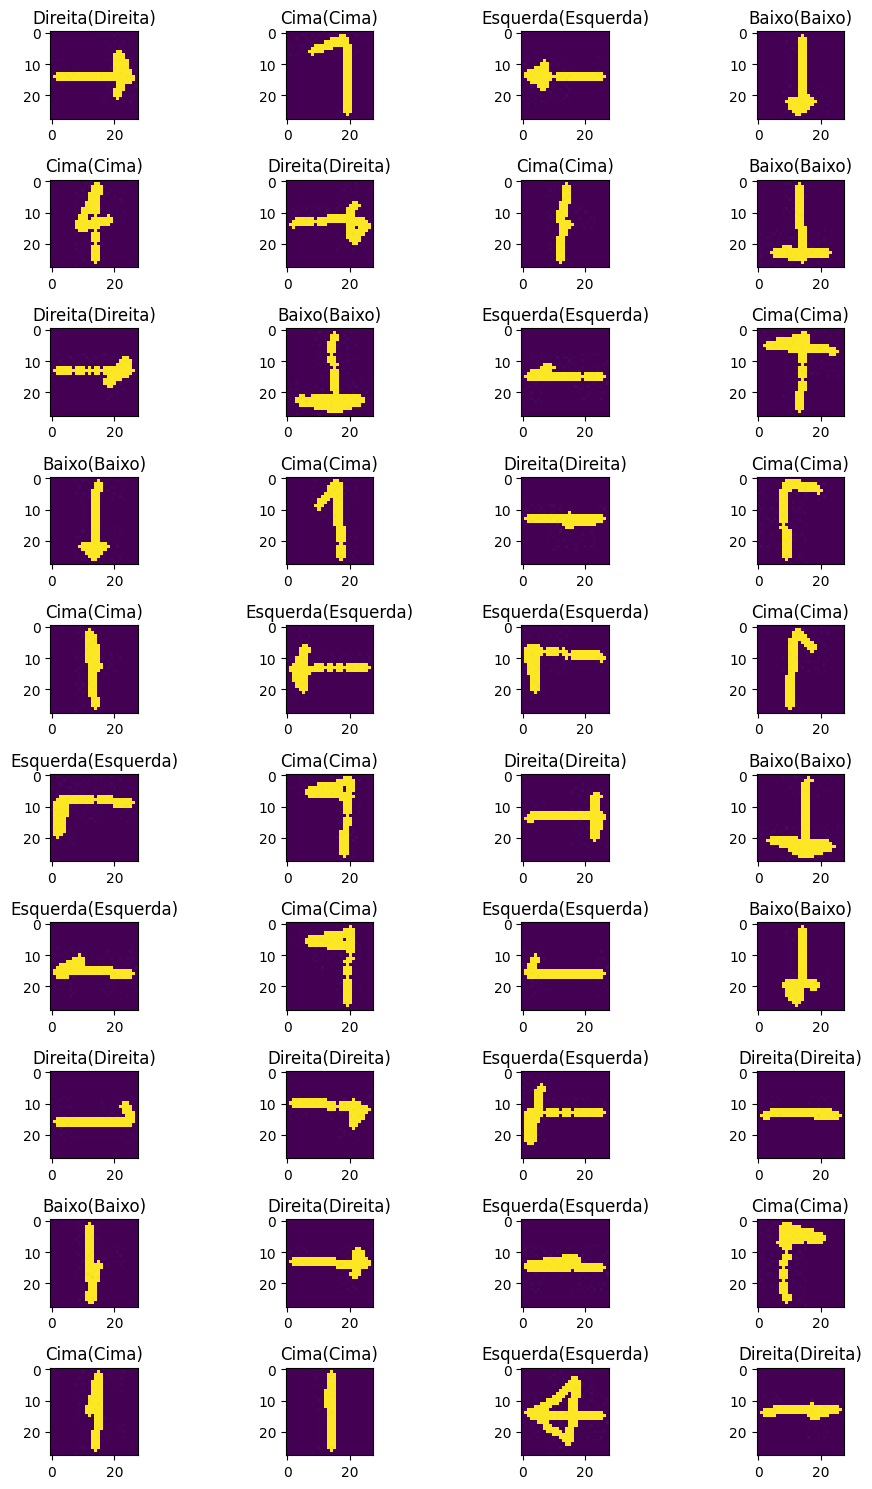

In [56]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    match yhats[i]:
        case 0:
            name = "Baixo"
        case 1:
            name = "Cima"
        case 2:
            name = "Esquerda"
        case 3:
            name = "Direita"
    match ysArg[i]:
        case 0:
            Rname = "Baixo"
        case 1:
            Rname = "Cima"
        case 2:
            Rname = "Esquerda"
        case 3:
            Rname = "Direita"
    plt.title(f'{name}({Rname})')
fig.tight_layout()
plt.show()

In [57]:
print(f)

MyCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=648, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
  (R): ReLU()
)


In [58]:
torch.save(f.state_dict(), 'CNN1.pth')